In [ ]:
import keras
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
X_train[0].shape

(32, 32, 3)

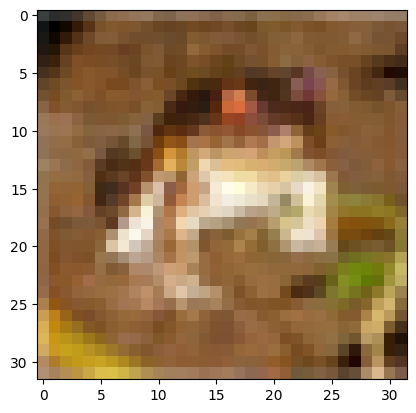

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='gray')

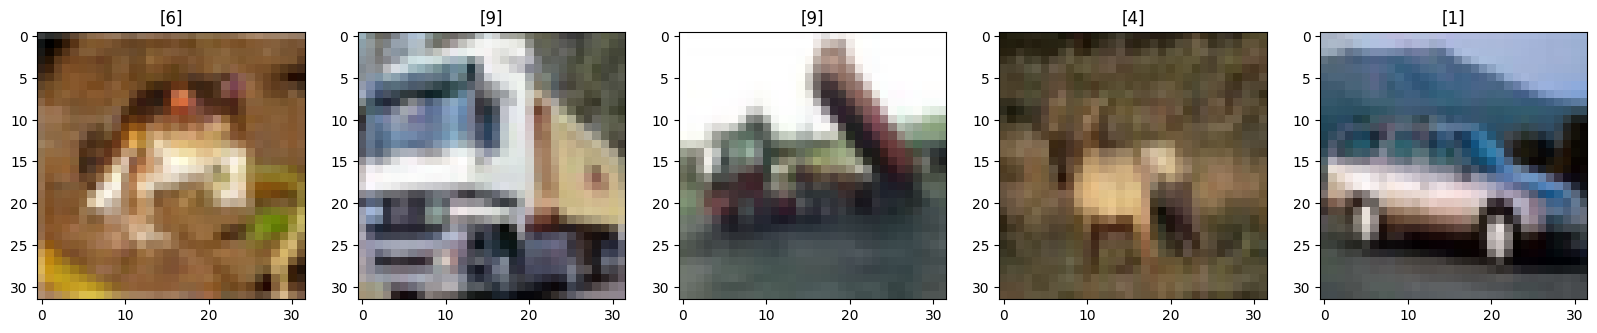

In [ ]:
fig=plt.figure(figsize=(20,20))
for i in range(5):
  ax=fig.add_subplot(1,5,i+1)
  ax.imshow(X_train[i],cmap='gray')
  ax.set_title(str(y_train[i]))

In [ ]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [ ]:
print(X_train.shape)

(50000, 32, 32, 3)


In [ ]:
X_train[0].max

<function ndarray.max>

In [ ]:
import numpy as np
len(np.unique(y_train))

10

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
y_train.ndim

2

In [ ]:
X_train.shape[0]==y_train.shape[0]
X_test.shape[0]==y_test.shape[0]

True

# **Model1**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=1))

model.add(Conv2D(64,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=1))

model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=1))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',
                            patience=4,
                            restore_best_weights=True,
                         verbose=1)
checkpoint=ModelCheckpoint(filepath='model1.keras',
                             verbose=1,
                             save_best_only=True)


In [ ]:
hist1=model.fit(X_train,y_train,batch_size=80,epochs=20,
               validation_data=(X_test,y_test),
               callbacks=[early_stop,checkpoint],
               verbose=2,shuffle=True)

Epoch 1/20

Epoch 1: val_loss improved from inf to 1.21596, saving model to model2.keras
625/625 - 15s - 24ms/step - accuracy: 0.4660 - loss: 1.4736 - val_accuracy: 0.5737 - val_loss: 1.2160
Epoch 2/20

Epoch 2: val_loss improved from 1.21596 to 1.06295, saving model to model2.keras
625/625 - 16s - 25ms/step - accuracy: 0.5989 - loss: 1.1344 - val_accuracy: 0.6249 - val_loss: 1.0629
Epoch 3/20

Epoch 3: val_loss improved from 1.06295 to 1.03209, saving model to model2.keras
625/625 - 10s - 17ms/step - accuracy: 0.6449 - loss: 1.0125 - val_accuracy: 0.6402 - val_loss: 1.0321
Epoch 4/20

Epoch 4: val_loss improved from 1.03209 to 0.95014, saving model to model2.keras
625/625 - 10s - 16ms/step - accuracy: 0.6746 - loss: 0.9322 - val_accuracy: 0.6656 - val_loss: 0.9501
Epoch 5/20

Epoch 5: val_loss did not improve from 0.95014
625/625 - 10s - 16ms/step - accuracy: 0.6958 - loss: 0.8690 - val_accuracy: 0.6555 - val_loss: 0.9782
Epoch 6/20

Epoch 6: val_loss improved from 0.95014 to 0.92371,

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6999 - loss: 0.8712
Test loss: 0.8942499160766602
Test accuracy: 0.6996999979019165


# **Model2**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(60, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(Conv2D(60, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(100, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

early_stopp2=EarlyStopping(monitor='val_loss',
                            patience=4,
                            restore_best_weights=True,
                         verbose=1)
checkpoint2=ModelCheckpoint(filepath='model2.keras',
                             verbose=1,
                             save_best_only=True)


In [ ]:
hist2=model2.fit(X_train,y_train,batch_size=64,epochs=20,
               validation_data=(X_test,y_test),
               callbacks=[early_stop2,checkpoint2],
               verbose=2,shuffle=True)

Epoch 1/20

Epoch 1: val_loss did not improve from 0.89425
782/782 - 17s - 22ms/step - accuracy: 0.3506 - loss: 1.7721 - val_accuracy: 0.4789 - val_loss: 1.4274
Epoch 2/20

Epoch 2: val_loss did not improve from 0.89425
782/782 - 10s - 13ms/step - accuracy: 0.5268 - loss: 1.3289 - val_accuracy: 0.5670 - val_loss: 1.2326
Epoch 3/20

Epoch 3: val_loss did not improve from 0.89425
782/782 - 10s - 13ms/step - accuracy: 0.5996 - loss: 1.1319 - val_accuracy: 0.6547 - val_loss: 0.9841
Epoch 4/20

Epoch 4: val_loss improved from 0.89425 to 0.88637, saving model to model2.keras
782/782 - 6s - 7ms/step - accuracy: 0.6487 - loss: 1.0071 - val_accuracy: 0.7007 - val_loss: 0.8864
Epoch 5/20

Epoch 5: val_loss improved from 0.88637 to 0.83126, saving model to model2.keras
782/782 - 10s - 13ms/step - accuracy: 0.6812 - loss: 0.9186 - val_accuracy: 0.7108 - val_loss: 0.8313
Epoch 6/20

Epoch 6: val_loss did not improve from 0.83126
782/782 - 10s - 13ms/step - accuracy: 0.7033 - loss: 0.8591 - val_accu

In [ ]:
loss, accuracy = model2.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7145 - loss: 0.8269
Test loss: 0.8312578201293945
Test accuracy: 0.7107999920845032


# **Model3**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model3 = Sequential()

model3.add(Conv2D(28, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model3.add(Conv2D(28, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(70, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(Conv2D(70, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(60, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 28)     │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 28)     │         7,084 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 70)     │        17,710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 70)     │        44,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 70)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 70)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │        80,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 60)             │         7,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,138 (1.61 MB)

 Trainable params: 421,138 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

early_stop3=EarlyStopping(monitor='val_loss',
                            patience=5,
                            restore_best_weights=True,
                         verbose=1)
checkpoint3=ModelCheckpoint(filepath='model1.keras',
                             verbose=1,
                             save_best_only=True)

In [ ]:
hist3=model3.fit(X_train,y_train,batch_size=80,epochs=20,
               validation_data=(X_test,y_test),
               callbacks=[early_stop3,checkpoint3],
               verbose=2,shuffle=True)

Epoch 1/20

Epoch 1: val_loss improved from inf to 1.48660, saving model to model1.keras
625/625 - 14s - 22ms/step - accuracy: 0.2976 - loss: 1.9127 - val_accuracy: 0.4549 - val_loss: 1.4866
Epoch 2/20

Epoch 2: val_loss improved from 1.48660 to 1.23506, saving model to model1.keras
625/625 - 14s - 22ms/step - accuracy: 0.4768 - loss: 1.4571 - val_accuracy: 0.5547 - val_loss: 1.2351
Epoch 3/20

Epoch 3: val_loss improved from 1.23506 to 1.01957, saving model to model1.keras
625/625 - 10s - 16ms/step - accuracy: 0.5677 - loss: 1.2348 - val_accuracy: 0.6427 - val_loss: 1.0196
Epoch 4/20

Epoch 4: val_loss improved from 1.01957 to 0.91956, saving model to model1.keras
625/625 - 11s - 17ms/step - accuracy: 0.6269 - loss: 1.0861 - val_accuracy: 0.6880 - val_loss: 0.9196
Epoch 5/20

Epoch 5: val_loss improved from 0.91956 to 0.86386, saving model to model1.keras
625/625 - 6s - 9ms/step - accuracy: 0.6647 - loss: 0.9781 - val_accuracy: 0.7000 - val_loss: 0.8639
Epoch 6/20

Epoch 6: val_loss i

In [ ]:
loss, accuracy = model3.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7910 - loss: 0.6282
Test loss: 0.6349669694900513
Test accuracy: 0.7932999730110168


# **Model4**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model4 = Sequential()

model4.add(Conv2D(20, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model4.add(Conv2D(24, kernel_size=(3, 3), activation='relu', padding='same'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(36, kernel_size=(3, 3), activation='relu', padding='same'))
model4.add(Conv2D(40, kernel_size=(3, 3), activation='relu', padding='same'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.3))

model4.add(Conv2D(48, kernel_size=(3, 3), activation='relu', padding='same'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.35))

model4.add(Flatten())
model4.add(Dense(60, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(10, activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 20)     │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 24)     │         4,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 36)     │         7,812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 40)     │        13,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 48)       │        17,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │        46,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,794 (350.76 KB)

 Trainable params: 89,794 (350.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model4.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

early_stop4=EarlyStopping(monitor='val_loss',
                            patience=5,
                            restore_best_weights=True,
                         verbose=1)
checkpoint4=ModelCheckpoint(filepath='model4.keras',
                             verbose=1,
                             save_best_only=True)

In [ ]:
hist4=model4.fit(X_train,y_train,batch_size=80,epochs=30,
               validation_data=(X_test,y_test),
               callbacks=[early_stop4,checkpoint4],
               verbose=2,shuffle=True)

Epoch 1/30

Epoch 1: val_loss improved from inf to 1.53459, saving model to model4.keras
625/625 - 11s - 18ms/step - accuracy: 0.2949 - loss: 1.8996 - val_accuracy: 0.4268 - val_loss: 1.5346
Epoch 2/30

Epoch 2: val_loss improved from 1.53459 to 1.38356, saving model to model4.keras
625/625 - 4s - 6ms/step - accuracy: 0.4327 - loss: 1.5529 - val_accuracy: 0.4949 - val_loss: 1.3836
Epoch 3/30

Epoch 3: val_loss improved from 1.38356 to 1.19757, saving model to model4.keras
625/625 - 4s - 6ms/step - accuracy: 0.5017 - loss: 1.3859 - val_accuracy: 0.5708 - val_loss: 1.1976
Epoch 4/30

Epoch 4: val_loss improved from 1.19757 to 1.11013, saving model to model4.keras
625/625 - 5s - 9ms/step - accuracy: 0.5475 - loss: 1.2689 - val_accuracy: 0.6072 - val_loss: 1.1101
Epoch 5/30

Epoch 5: val_loss improved from 1.11013 to 0.99938, saving model to model4.keras
625/625 - 5s - 9ms/step - accuracy: 0.5812 - loss: 1.1857 - val_accuracy: 0.6441 - val_loss: 0.9994
Epoch 6/30

Epoch 6: val_loss did not

In [ ]:
loss, accuracy = model4.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7463 - loss: 0.7765
Test loss: 0.7785274386405945
Test accuracy: 0.7459999918937683


# **Model5**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model5 = Sequential()

model5.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model5.add(Conv2D(22, kernel_size=(3, 3), activation='relu', padding='same'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.25))

model5.add(Conv2D(28, kernel_size=(3, 3), activation='relu', padding='same'))
model5.add(Conv2D(34, kernel_size=(3, 3), activation='relu', padding='same'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.3))

model5.add(Conv2D(50, kernel_size=(3, 3), activation='relu', padding='same'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.3))

model5.add(Flatten())
model5.add(Dense(50, activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(10, activation='softmax'))




In [ ]:
model5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 22)     │         3,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 22)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 28)     │         5,572 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 34)     │         8,602 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 34)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 34)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 50)       │        15,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        40,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,446 (575.96 KB)

 Trainable params: 73,722 (287.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 73,724 (287.99 KB)

In [ ]:
model5.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

early_stop5=EarlyStopping(monitor='val_loss',
                            patience=10,
                            restore_best_weights=True,
                         verbose=1)
checkpoint5=ModelCheckpoint(filepath='model4.keras',
                             verbose=1,
                             save_best_only=True)

In [ ]:
hist5=model5.fit(X_train,y_train,batch_size=84,epochs=50,
               validation_data=(X_test,y_test),
               callbacks=[early_stop5,checkpoint5],
               verbose=2,shuffle=True)

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.63883, saving model to model4.keras
596/596 - 14s - 23ms/step - accuracy: 0.3013 - loss: 1.8810 - val_accuracy: 0.4093 - val_loss: 1.6388
Epoch 2/50

Epoch 2: val_loss improved from 1.63883 to 1.53129, saving model to model4.keras
596/596 - 4s - 6ms/step - accuracy: 0.4423 - loss: 1.5209 - val_accuracy: 0.4421 - val_loss: 1.5313
Epoch 3/50

Epoch 3: val_loss improved from 1.53129 to 1.46814, saving model to model4.keras
596/596 - 4s - 7ms/step - accuracy: 0.5046 - loss: 1.3720 - val_accuracy: 0.4755 - val_loss: 1.4681
Epoch 4/50

Epoch 4: val_loss improved from 1.46814 to 1.17706, saving model to model4.keras
596/596 - 5s - 8ms/step - accuracy: 0.5438 - loss: 1.2728 - val_accuracy: 0.5750 - val_loss: 1.1771
Epoch 5/50

Epoch 5: val_loss did not improve from 1.17706
596/596 - 3s - 6ms/step - accuracy: 0.5734 - loss: 1.2023 - val_accuracy: 0.5432 - val_loss: 1.2748
Epoch 6/50

Epoch 6: val_loss did not improve from 1.17706
596/596 - 5s

In [ ]:
loss, accuracy = model5.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7260 - loss: 0.8103
Test loss: 0.8153825998306274
Test accuracy: 0.72079998254776


# **Model6**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model6 = Sequential()

model6.add(Conv2D(16, kernel_size=(2, 2), activation='relu', padding='same', input_shape=(32, 32, 3)))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

model6.add(Conv2D(28, kernel_size=(3, 3), activation='relu', padding='same'))
model6.add(Conv2D(34, kernel_size=(3, 3), activation='relu', padding='same'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.2))

model6.add(Conv2D(84, kernel_size=(3, 3), activation='relu', padding='same'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

model6.add(Flatten())
model6.add(Dense(62, activation='relu'))
model6.add(Dropout(0.3))
model6.add(Dense(10, activation='softmax'))
model6.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 28)     │         4,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 34)     │         8,602 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 34)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 34)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 84)       │        25,788 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 84)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 84)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1344)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 62)             │        83,390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 62)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           630 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,678 (479.21 KB)

 Trainable params: 122,678 (479.21 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model6.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
hist6=model6.fit(X_train,y_train,batch_size=84,epochs=50,
               validation_data=(X_test,y_test),
               callbacks=[early_stop5,checkpoint5],
               verbose=2,shuffle=True)

Epoch 1/50

Epoch 1: val_loss did not improve from 0.81538
596/596 - 13s - 22ms/step - accuracy: 0.3075 - loss: 1.9015 - val_accuracy: 0.3992 - val_loss: 1.6162
Epoch 2/50

Epoch 2: val_loss did not improve from 0.81538
596/596 - 3s - 4ms/step - accuracy: 0.4462 - loss: 1.5318 - val_accuracy: 0.4980 - val_loss: 1.4253
Epoch 3/50

Epoch 3: val_loss did not improve from 0.81538
596/596 - 3s - 4ms/step - accuracy: 0.5059 - loss: 1.3747 - val_accuracy: 0.5323 - val_loss: 1.3579
Epoch 4/50

Epoch 4: val_loss did not improve from 0.81538
596/596 - 5s - 9ms/step - accuracy: 0.5464 - loss: 1.2709 - val_accuracy: 0.6051 - val_loss: 1.1136
Epoch 5/50

Epoch 5: val_loss did not improve from 0.81538
596/596 - 5s - 9ms/step - accuracy: 0.5754 - loss: 1.1993 - val_accuracy: 0.5667 - val_loss: 1.2233
Epoch 6/50

Epoch 6: val_loss did not improve from 0.81538
596/596 - 3s - 5ms/step - accuracy: 0.5927 - loss: 1.1446 - val_accuracy: 0.6205 - val_loss: 1.0695
Epoch 7/50

Epoch 7: val_loss did not improv

In [ ]:
loss, accuracy = model6.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7389 - loss: 0.7724
Test loss: 0.7741512060165405
Test accuracy: 0.7390000224113464


# **Model7**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model7 = Sequential()

model7.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.3))

model7.add(Conv2D(28, kernel_size=(3, 3), activation='relu', padding='same'))
model7.add(Conv2D(34, kernel_size=(3, 3), activation='relu', padding='same'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.2))

model7.add(Conv2D(100, kernel_size=(3, 3), activation='relu', padding='same'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.3))

model7.add(Flatten())
model7.add(Dense(62, activation='relu'))
model7.add(Dropout(0.4))
model7.add(Dense(10, activation='softmax'))
model7.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 16, 16, 28)     │         8,092 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 34)     │         8,602 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 34)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 8, 8, 34)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 8, 8, 100)      │        30,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 4, 4, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 62)             │        99,262 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 62)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           630 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,182 (578.84 KB)

 Trainable params: 148,182 (578.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model7.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

hist7=model7.fit(X_train,y_train,batch_size=84,epochs=50,
               validation_data=(X_test,y_test),
               callbacks=[early_stop5,checkpoint5],
               verbose=2,shuffle=True)

Epoch 1/50

Epoch 1: val_loss did not improve from 0.74480
596/596 - 12s - 21ms/step - accuracy: 0.2995 - loss: 1.9019 - val_accuracy: 0.4336 - val_loss: 1.5338
Epoch 2/50

Epoch 2: val_loss did not improve from 0.74480
596/596 - 13s - 21ms/step - accuracy: 0.4313 - loss: 1.5696 - val_accuracy: 0.4896 - val_loss: 1.3891
Epoch 3/50

Epoch 3: val_loss did not improve from 0.74480
596/596 - 6s - 10ms/step - accuracy: 0.4902 - loss: 1.4250 - val_accuracy: 0.5422 - val_loss: 1.2772
Epoch 4/50

Epoch 4: val_loss did not improve from 0.74480
596/596 - 4s - 7ms/step - accuracy: 0.5315 - loss: 1.3211 - val_accuracy: 0.5889 - val_loss: 1.1601
Epoch 5/50

Epoch 5: val_loss did not improve from 0.74480
596/596 - 3s - 5ms/step - accuracy: 0.5661 - loss: 1.2322 - val_accuracy: 0.6202 - val_loss: 1.0626
Epoch 6/50

Epoch 6: val_loss did not improve from 0.74480
596/596 - 4s - 7ms/step - accuracy: 0.5895 - loss: 1.1734 - val_accuracy: 0.6258 - val_loss: 1.0484
Epoch 7/50

Epoch 7: val_loss did not imp

In [ ]:
loss, accuracy = model7.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7521 - loss: 0.7621
Test loss: 0.7678544521331787
Test accuracy: 0.7508000135421753


# **Model8**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model8 = Sequential()

model8.add(Conv2D(26, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model8.add(BatchNormalization())
model8.add(Conv2D(30, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))

model8.add(Conv2D(44, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(BatchNormalization())
model8.add(Conv2D(48, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.3))

model8.add(Conv2D(72, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.4))

model8.add(Flatten())
model8.add(Dense(96, activation='relu'))
model8.add(Dropout(0.5))
model8.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model8.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 32, 32, 26)     │           728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 26)     │           104 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 32, 32, 30)     │         7,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 30)     │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 16, 16, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 16, 16, 44)     │        11,924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 44)     │           176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 16, 16, 48)     │        19,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 8, 8, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 8, 8, 72)       │        31,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 72)       │           288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 4, 4, 72)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 4, 4, 72)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 96)             │       110,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,472 (712.78 KB)

 Trainable params: 182,032 (711.06 KB)

 Non-trainable params: 440 (1.72 KB)

In [ ]:
model8.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

early_stop8=EarlyStopping(monitor='val_loss',
                            patience=10,
                            restore_best_weights=True,
                         verbose=1)
checkpoint8=ModelCheckpoint(filepath='model8.keras',
                             verbose=1,
                             save_best_only=True)
hist8=model8.fit(X_train,y_train,batch_size=84,epochs=50,
               validation_data=(X_test,y_test),
               callbacks=[early_stop8,checkpoint8],
               verbose=2,shuffle=True)

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.92492, saving model to model8.keras
596/596 - 17s - 28ms/step - accuracy: 0.6344 - loss: 1.0619 - val_accuracy: 0.6818 - val_loss: 0.9249
Epoch 2/50

Epoch 2: val_loss did not improve from 0.92492
596/596 - 5s - 8ms/step - accuracy: 0.6569 - loss: 1.0034 - val_accuracy: 0.6530 - val_loss: 1.0079
Epoch 3/50

Epoch 3: val_loss improved from 0.92492 to 0.82566, saving model to model8.keras
596/596 - 5s - 9ms/step - accuracy: 0.6733 - loss: 0.9547 - val_accuracy: 0.7172 - val_loss: 0.8257
Epoch 4/50

Epoch 4: val_loss did not improve from 0.82566
596/596 - 5s - 8ms/step - accuracy: 0.6920 - loss: 0.9088 - val_accuracy: 0.6888 - val_loss: 0.8992
Epoch 5/50

Epoch 5: val_loss improved from 0.82566 to 0.82552, saving model to model8.keras
596/596 - 5s - 9ms/step - accuracy: 0.6977 - loss: 0.8802 - val_accuracy: 0.7183 - val_loss: 0.8255
Epoch 6/50

Epoch 6: val_loss improved from 0.82552 to 0.72724, saving model to model8.keras
596/596 - 5s

In [ ]:
loss, accuracy = model8.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8089 - loss: 0.5572
Test loss: 0.5617115497589111
Test accuracy: 0.8087999820709229


## Model9   (BEST MODEL)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model9 = Sequential()

model9.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model9.add(BatchNormalization())
model9.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model9.add(BatchNormalization())
model9.add(MaxPooling2D((2, 2)))
model9.add(Dropout(0.25))

model9.add(Conv2D(48, (3, 3), activation='relu', padding='same'))
model9.add(BatchNormalization())
model9.add(Conv2D(48, (3, 3), activation='relu', padding='same'))
model9.add(BatchNormalization())
model9.add(MaxPooling2D((2, 2)))
model9.add(Dropout(0.3))

model9.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model9.add(BatchNormalization())
model9.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model9.add(BatchNormalization())
model9.add(MaxPooling2D((2, 2)))
model9.add(Dropout(0.4))

model9.add(Flatten())
model9.add(Dense(128, activation='relu'))
model9.add(Dropout(0.5))
model9.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model9.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,29

 Total params: 243,082 (949.54 KB)

 Trainable params: 242,506 (947.29 KB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
model9.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#  ReduceLROnPlateau?
It reduces the learning rate automatically when a metric (like validation loss) stops improving for a few epochs.

📉 Lower learning rate = finer updates = better convergence when you're near the optimal point.



In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
early_stop9 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
checkpoint9 = ModelCheckpoint(filepath='model9.keras', verbose=1, save_best_only=True)
reduce_lr9 = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)




In [ ]:
hist9 = model9.fit(
    X_train, y_train,
    batch_size=64,
    epochs=60,
    validation_data=(X_test, y_test),
    callbacks=[early_stop9, checkpoint9, reduce_lr9],
    verbose=2,
    shuffle=True
)

Epoch 1/60

Epoch 1: val_loss improved from inf to 1.44666, saving model to model9.keras
782/782 - 26s - 33ms/step - accuracy: 0.3312 - loss: 1.8458 - val_accuracy: 0.4756 - val_loss: 1.4467 - learning_rate: 1.0000e-03
Epoch 2/60

Epoch 2: val_loss improved from 1.44666 to 1.36562, saving model to model9.keras
782/782 - 25s - 33ms/step - accuracy: 0.4945 - loss: 1.3980 - val_accuracy: 0.5114 - val_loss: 1.3656 - learning_rate: 1.0000e-03
Epoch 3/60

Epoch 3: val_loss improved from 1.36562 to 0.98139, saving model to model9.keras
782/782 - 6s - 7ms/step - accuracy: 0.5821 - loss: 1.1842 - val_accuracy: 0.6513 - val_loss: 0.9814 - learning_rate: 1.0000e-03
Epoch 4/60

Epoch 4: val_loss improved from 0.98139 to 0.91998, saving model to model9.keras
782/782 - 10s - 13ms/step - accuracy: 0.6366 - loss: 1.0433 - val_accuracy: 0.6743 - val_loss: 0.9200 - learning_rate: 1.0000e-03
Epoch 5/60

Epoch 5: val_loss improved from 0.91998 to 0.82164, saving model to model9.keras
782/782 - 10s - 13ms/

In [ ]:
loss, accuracy = model9.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8680 - loss: 0.4197
Test loss: 0.425121545791626
Test accuracy: 0.8666999936103821


USED MODEL 9 FOR PREDICTION

In [ ]:
y_hat = model9.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']


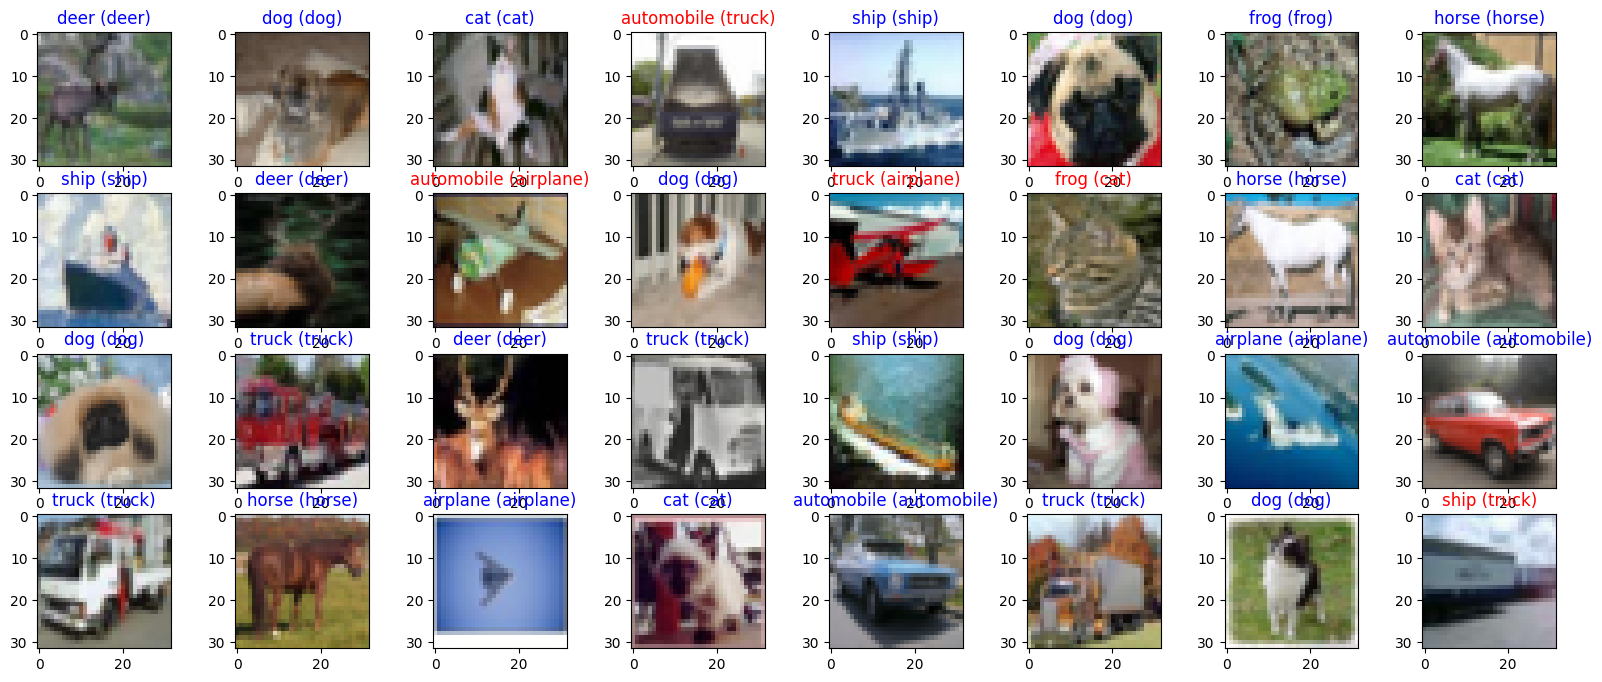

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20, 8))

for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1)
    ax.imshow(X_test[idx])

    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])

    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color="blue" if pred_idx == true_idx else "red")


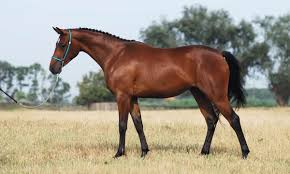

In [ ]:
from google.colab.patches import cv2_imshow
import os, json, cv2, random

im = cv2.imread("/content/horse.jpg")
cv2_imshow(im)


In [ ]:
im.shape

(174, 290, 3)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Load and resize to 32x32
img = load_img('/content/horse.jpg', target_size=(32, 32))
img_array = img_to_array(img)


In [ ]:
img_array.shape

(32, 32, 3)

In [ ]:
img_array.max()

np.float32(255.0)

In [ ]:
print(X_test.max())
print(X_test.min())


1.0
0.0


In [ ]:
img_array = img_array / 255.0


In [ ]:
img_array.shape

(32, 32, 3)

In [ ]:
img_array.max()

np.float32(1.0)

In [ ]:
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
prediction = model9.predict(img_array)
predicted_class = np.argmax(prediction[0])
print("Predicted class:", cifar10_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step
Predicted class: horse


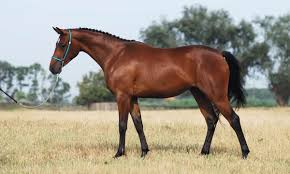

In [ ]:
cv2_imshow(im)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img2 = load_img('/content/ship.jpg', target_size=(32, 32))
arr2 = img_to_array(img2)
arr2_input = np.expand_dims(arr2 / 255.0, axis=0)
pred2 = model9.predict(arr2_input)
cls2 = np.argmax(pred2[0])
print("Predicted class:", cifar10_labels[cls2])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: ship


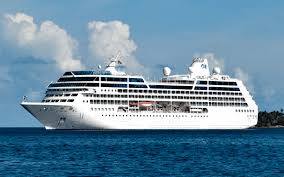

In [ ]:
img_original2 = cv2.imread('/content/ship.jpg')
cv2_imshow(img_original2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: bird


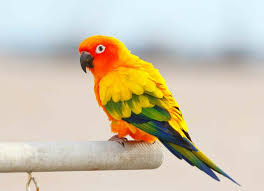

In [ ]:
img3 = load_img('/content/bird2.jpg', target_size=(32, 32))
arr3 = img_to_array(img3)
arr3_input = np.expand_dims(arr3 / 255.0, axis=0)
pred3 = model9.predict(arr3_input)
cls3 = np.argmax(pred3[0])
print("Predicted class:", cifar10_labels[cls3])

img_original3 = cv2.imread('/content/bird2.jpg')
cv2_imshow(img_original3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: frog


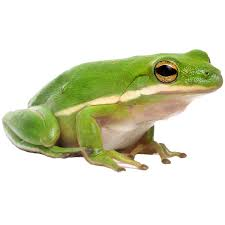

In [ ]:
img4 = load_img('/content/frog.jpg', target_size=(32, 32))
arr4 = img_to_array(img4)
arr4_input = np.expand_dims(arr4 / 255.0, axis=0)
pred4 = model9.predict(arr4_input)
cls4 = np.argmax(pred4[0])
print("Predicted class:", cifar10_labels[cls4])

img_original4 = cv2.imread('/content/frog.jpg')
cv2_imshow(img_original4)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: truck


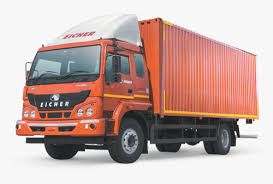

In [ ]:
img5 = load_img('/content/truck.jpg', target_size=(32, 32))
arr5 = img_to_array(img5)
arr5_input = np.expand_dims(arr5 / 255.0, axis=0)
pred5 = model9.predict(arr5_input)
cls5 = np.argmax(pred5[0])
print("Predicted class:", cifar10_labels[cls5])

img_original5 = cv2.imread('/content/truck.jpg')
cv2_imshow(img_original5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: dog


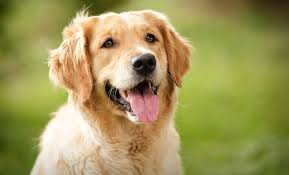

In [ ]:
img6 = load_img('/content/dog3.jpg', target_size=(32, 32))
arr6 = img_to_array(img6)
arr6_input = np.expand_dims(arr6 / 255.0, axis=0)
pred6 = model9.predict(arr6_input)
cls6 = np.argmax(pred6[0])
print("Predicted class:", cifar10_labels[cls6])

img_original6 = cv2.imread('/content/dog3.jpg')
cv2_imshow(img_original6)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: airplane


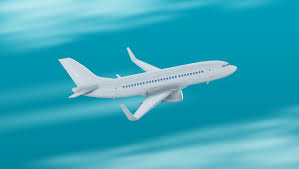

In [ ]:
img7 = load_img('/content/aeroplane.jpg', target_size=(32, 32))
arr7 = img_to_array(img7)
arr7_input = np.expand_dims(arr7 / 255.0, axis=0)
pred7 = model9.predict(arr7_input)
cls7 = np.argmax(pred7[0])
print("Predicted class:", cifar10_labels[cls7])

img_original7 = cv2.imread('/content/aeroplane.jpg')
cv2_imshow(img_original7)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: cat


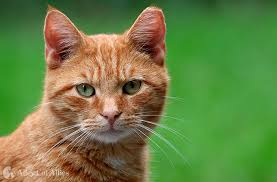

In [ ]:
img8 = load_img('/content/cat2.jpg', target_size=(32, 32))
arr8 = img_to_array(img8)
arr8_input = np.expand_dims(arr8 / 255.0, axis=0)
pred8 = model9.predict(arr8_input)
cls8 = np.argmax(pred8[0])
print("Predicted class:", cifar10_labels[cls8])

img_original8 = cv2.imread('/content/cat2.jpg')
cv2_imshow(img_original8)
